# DIgital Epidemiology Project 

## Modules

In [1]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import netwulf as nw
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
###import georaster as gr
import pandas as pd
from shapely.geometry import Point, LineString
###import pysal as ps
###from pysal.contrib.viz import mapping as maps

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Data Wrangling 

### Geospatial 

#### Provinces (NUTS 3)

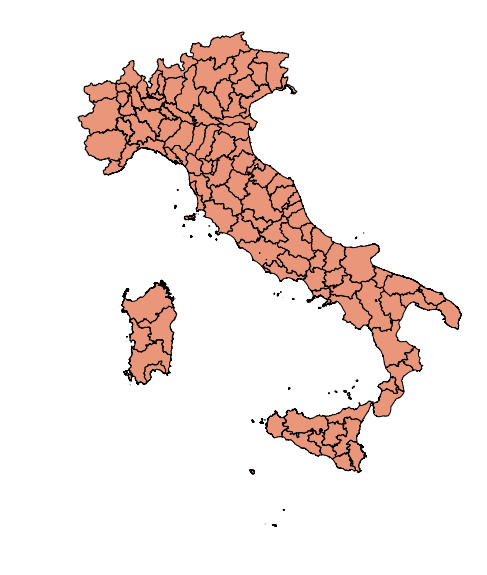

In [2]:
# Set geodata file path
##provinces = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" # PIETRO 1
provinces = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" # PIETRO 2
##provinces = r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject/Data\Shapefiles\ProvCM01012020\ProvCM01012020_WGS84.shp" # DAVIDE

### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp" (LINE)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndA.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"  (AREA)

# Store data
provincial_data = gpd.read_file(provinces)

# Visualize GeoDataFrame
provincial_data.plot(figsize=(10, 10),
                     color='darksalmon', 
                     edgecolor='black',
                     alpha=1).set_axis_off()

### Mobility

Source: [Matrici del Pensolarismo (2011)](https://www.istat.it/it/archivio/139381)

In [36]:
# Load Commuting Graph Data
##commuting_edgelist = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/ProvincialCommutingGraph.csv") # PIETRO 1 
commuting_edgelist = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/ProvincialCommutingGraph.csv") # PIETRO 2 
##commuting_edgelist = pd.read_csv(r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject\Data\CSV\ProvincialCommutingGraph.csv") # DAVIDE

commuting_edgelist

source  target   weight
0          1       0      142
1          1       1  1110142
2          1       2     3123
3          1       3      880
4          1       4     8216
...      ...     ...      ...
4192     110      77       48
4193     110      78        1
4194     110      79        2
4195     110     101        1
4196     110     110   152950

[4197 rows x 3 columns]

In [48]:
commuting_graph = nx.from_pandas_edgelist(commuting_edgelist, edge_attr=True)

CONNECTIVITY:
• 111 nodes;
• 2450 edges.


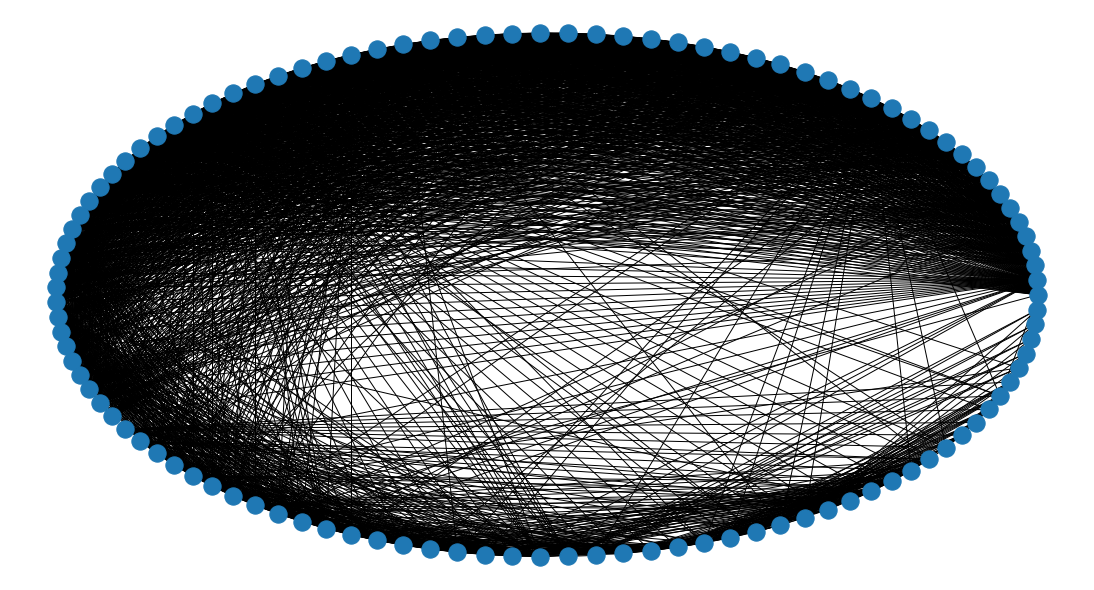

In [56]:
# Showcase connectivity
print("CONNECTIVITY:\n•",commuting_graph.number_of_nodes(),"nodes;\n•",commuting_graph.number_of_edges(),"edges.")

# Visualize Graph
#fig=plt.figure(figsize=(15,8))
#nx.draw_circular(commuting_graph)
#plt.axis('off')
#plt.show()


```nw.visualize(commuting_graph)```

![Commuting Graph Visualization](commuting_graph.png)

### Contact

* Prem K, Cook AR, Jit M (2017). [Projecting social contact matrices in 152 countries using contact surveys and demographic data](https://doi.org/10.1371/journal.pcbi.1005697). PLoS Comput Biol 13(9).
* Kiesha Prem et al. (2020). [Projecting contact matrices in 177 geographical regions: an update and comparison with empirical data for the COVID-19 era](https://doi.org/10.1101/2020.07.22.20159772). medRxiv pre-print. 

In [12]:
##np.genfromtxt("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv", delimiter=',', names=True) # PIETRO 1

all_locations = np.genfromtxt("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv", delimiter=',', names=True) # PIETRO 2

x = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ContactMatrixAllLocations.csv") # PIETRO 2

##np.genfromtxt(r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject\Data\CSV\2020\ContactMatrixAllLocations.csv", delimiter=',', names=True) # DAVIDE 

In [13]:
x

V1        V2        V3        V4       V5       V6       V7       V8  \
0   3.04344   1.24649   0.26198   0.16686  0.19565  0.43121  0.67155  1.11993   
1   1.20845  10.12880   1.00301   0.11219  0.14250  0.18904  0.51720  1.02111   
2   0.15347   3.08049  16.17287   0.71628  0.51446  0.28057  0.35462  0.54905   
3   0.09025   0.34056   5.07975  15.37560  1.07688  0.52571  0.26177  0.30250   
4   0.27539   0.15677   0.19176   2.30237  5.39306  2.06936  1.09298  0.92067   
5   0.08507   0.13585   0.12529   0.67974  2.63195  4.72612  2.64677  1.51947   
6   0.63588   0.37516   0.48320   0.16951  0.92486  1.82882  3.79013  1.90556   
7   0.81874   0.90508   0.47935   0.29232  0.68016  1.56006  2.54251  4.87010   
8   0.73740   0.68818   0.72168   0.50397  0.83622  1.22860  2.06039  1.94286   
9   0.16633   0.49120   0.37070   0.75116  0.63304  0.69539  1.47258  1.56778   
10  0.10944   0.26885   0.66942   0.75212  0.67755  1.18010  0.99815  1.63481   
11  0.21930   0.39172   0.57760   0.15119  0.55108  1.19212  1.36672  1.35978   
12  0.23847   0.15470   0.16648   0.34485  0.52730  1.04079  1.07499  1.38335   
13  0.13948   0.14594   0.03041   0.02805  0.25568  0.53755  1.20458  0.99957   
14  0.04093   0.08626   0.20513   0.17619  0.11416  0.36410  0.40442  0.51903   
15  0.10790   0.12997   0.00000   0.37474  0.08632  0.00017  0.00058  0.24811   

         V9      V10      V11      V12      V13      V14      V15      V16  
0   0.86208  0.37999  0.31621  0.32382  0.25846  0.26476  0.24317  0.14253  
1   1.46645  0.34990  0.13343  0.11537  0.19032  0.19822  0.11511  0.05745  
2   1.25942  0.73103  0.45944  0.09019  0.11503  0.23597  0.16008  0.18881  
3   0.69626  1.08894  0.65863  0.10655  0.08485  0.02087  0.06133  0.05320  
4   0.74270  1.36324  1.14383  0.69260  0.27868  0.10778  0.15904  0.14770  
5   1.51516  1.26673  1.26020  0.88840  0.51667  0.08141  0.08952  0.03179  
6   1.46943  0.80479  0.98208  0.74662  0.56723  0.20307  0.16366  0.10306  
7   3.28484  1.79314  1.17994  0.87443  0.67121  0.56323  0.24777  0.12327  
8   3.54523  1.88090  1.78275  0.65343  0.53400  0.23473  0.26885  0.07972  
9   1.82190  2.30724  1.47966  0.84888  0.35512  0.17803  0.12830  0.18986  
10  1.78075  1.44077  1.90787  1.19174  0.56347  0.20941  0.24427  0.21446  
11  1.68336  1.41434  1.80958  2.56957  1.06207  0.36739  0.34524  0.19424  
12  1.45266  1.56278  1.03248  1.39016  1.57190  0.78409  0.51783  0.32990  
13  0.77545  0.65880  0.73736  0.62483  0.90700  2.07288  0.38102  0.26304  
14  0.89636  0.55803  0.39271  0.43228  1.15613  1.36244  1.42812  0.25108  
15  0.58928  1.04343  0.50446  1.17561  0.15126  1.64261  0.55532  0.00013

### Population 

In [68]:
##provincial_demographics = pd.read_csv("/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/CSV/2012/ProvincialDemographics.csv") # PIETRO 1
provincial_demographics = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2012/ProvincialDemographics.csv") # PIETRO 2 (2012)
##provincial_demographics = pd.read_csv("/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2020/ProvincialDemographics.csv") # PIETRO 2 (2020)
##provincial_demographics = pd.read_csv(r"C:\Users\Utente\Desktop\Progetti\Python\DigitalEpidemiologyProject\Data\CSV\2012\ProvincialDemographics.csv") # DAVIDE

In [69]:
total_population = provincial_demographics["Totale Maschi"] + provincial_demographics["Totale Femmine"]
provincial_demographics["Totale"] = total_population
provincial_demographics = provincial_demographics.drop(['Provincia', 'Maschi celibi', 'Maschi coniugati', 'Maschi divorziati', 'Maschi vedovi', 'Totale Maschi','Femmine nubili', 'Femmine coniugate', 'Femmine divorziate', 'Femmine vedove', 'Totale Femmine'], axis=1)

In [70]:
provincial_demographics

Codice provincia  Età  Totale
0                     1    0   19613
1                     1    1   19729
2                     1    2   20256
3                     1    3   20518
4                     1    4   20268
...                 ...  ...     ...
11105               110   96      75
11106               110   97      83
11107               110   98      53
11108               110   99      39
11109               110  100      52

[11110 rows x 3 columns]

In [71]:
provincial_demographics_under80 = provincial_demographics[provincial_demographics['Età'] <= 80]
provincial_demographics_under80

Codice provincia  Età  Totale
0                     1    0   19613
1                     1    1   19729
2                     1    2   20256
3                     1    3   20518
4                     1    4   20268
...                 ...  ...     ...
11085               110   76    2790
11086               110   77    2617
11087               110   78    2392
11088               110   79    2310
11089               110   80    2328

[8910 rows x 3 columns]

In [31]:
i = 1
province = provincial_demographics_under80[provincial_demographics_under80['Codice provincia'] == i]

In [32]:
province

Codice provincia  Età  Totale
0                  1    0   19613
1                  1    1   19729
2                  1    2   20256
3                  1    3   20518
4                  1    4   20268
..               ...  ...     ...
76                 1   76   22974
77                 1   77   21467
78                 1   78   20312
79                 1   79   19476
80                 1   80   18748

[81 rows x 3 columns]

In [63]:
lst = list(pd.cut(x=province['Età'], 
       bins=[-1, 5, 10, 15, 20, 25,
            30, 35, 40, 45, 50, 
            55, 60, 65, 70, 75, 80], 
       labels=['0-5', '5-10', '10-15', '15-20', '20-25',
                '25-30', '30-35', '35-40', '40-45', '45-50',
                '50-55', '55-60', '60-65', '65-70', '70-75','75-80']))

In [72]:
provincial_demographics_under80.to_csv('/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/2012/ProvincialDemographicsUnder80.csv', index=False)

## Modelling 